In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

In [2]:

def select_columns_for_reading(path, dbn):
   
    columns = pd.read_csv(path, nrows=0).columns.tolist()

    cols = []
    for col in columns:
        l = col.split('$')
        if len(l) == 1:
            cols.append(col)
            continue

    return cols

In [3]:
SOURCE_PATH = '../validation/data/merged.csv'

In [4]:
cols = select_columns_for_reading(SOURCE_PATH,0)
merged = pd.read_csv(SOURCE_PATH, usecols=cols)

In [5]:

   
def parse_city(shop_name):

    if shop_name.split()[0] == '!Якутск':
        return  'Якутск'

    if shop_name.split()[0] == 'Сергиев':
            return  'Сергиев Посад'
    else:
        return shop_name.split()[0]

In [6]:
categories_f = pd.read_csv('../data_cleaned/item_categories.csv')
shops_f = pd.read_csv('../data_cleaned/shops.csv')
categories_f['super_category']=categories_f['item_category_name'].apply(lambda a: a.split()[0])
shops_f['city']=shops_f['shop_name'].apply(parse_city)
merged=merged.drop(['city'],axis=1)
merged=merged.drop(['super_category'],axis=1)
merged=merged.merge(shops_f, how='left').merge(categories_f, how='left')


In [7]:
merged

,shop_id,item_id,item_category_id,shop_name,city,item_category_name,super_category
0,59,19611,40,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - DVD,Кино
1,28,20308,40,"Москва ТЦ ""МЕГА Теплый Стан"" II",Москва,Кино - DVD,Кино
2,15,2609,59,"Калуга ТРЦ ""XXI век""",Калуга,Музыка - Музыкальное видео,Музыка
3,49,9948,40,"Тюмень ТРЦ ""Кристалл""",Тюмень,Кино - DVD,Кино
4,29,9189,57,"Москва ТЦ ""Новый век"" (Новокосино)",Москва,Музыка - MP3,Музыка
...,...,...,...,...,...,...,...
1126681,41,20379,72,"РостовНаДону ТЦ ""Мега""",РостовНаДону,Подарки - Фигурки,Подарки
1126682,50,538,78,"Тюмень ТЦ ""Гудвин""",Тюмень,Программы - Обучающие (Цифра),Программы
1126683,56,14297,37,"Чехов ТРЦ ""Карнавал""",Чехов,Кино - Blu-Ray,Кино
1126684,42,22093,83,"СПб ТК ""Невский Центр""",СПб,Элементы питания,Элементы


In [8]:
mapping = {
    0: [[0, 12, 24], 'January'],
    1: [[1, 13, 25], 'February'],
    2: [[2, 14, 26], 'March'],
    3: [[3, 15, 27], 'April'],
    4: [[4, 16, 28], 'May'],
    5: [[5, 17, 29], 'June'],
    6: [[6, 18, 30], 'July'],
    7: [[7, 19, 31], 'August'],
    8: [[8, 20, 32], 'September'],
    9: [[9, 21, 33], 'October'],
    10: [[10, 22, 34], 'November'],
    11: [[11, 23, 35], 'December'],
}

In [9]:
#Assume that monthes are [22,34]  
preds = np.load('./val_preds.npy',allow_pickle=True)#preds_l.append(y_val_pred)
real = np.load('./val_true.npy',allow_pickle=True)#Y_true_l.append([np.array(Y_val).flatten(), np.array(shop_id).flatten(), np.array(item_id).flatten()])
errors = np.load('./val_errors.npy',allow_pickle=True)

In [10]:
preds[0]

array([array([0.07128714, 0.00637725, 0.01856017, ..., 0.01400191, 0.00829987,
              0.00601479])                                                    ],
      dtype=object)

In [11]:
df = pd.DataFrame({'shop_id':[], 'item_id':[],'date_block_num':[],'sales':[],'preds':[]})
for month in range(len(real)):
    month_num = month+22
    sales = real[month][:,0][0]
    shop_id=real[month][:,1][0]
    item_id=real[month][:,2][0]
    preds_val = preds[month][0]
    dbn = [month_num] * len(shop_id)
    to_app=pd.DataFrame({'shop_id':shop_id, 'item_id':item_id,'date_block_num':dbn,'sales':sales, 'preds':preds_val})
    df=pd.concat([df,to_app])



In [12]:
df=df.merge(merged)

In [13]:
df

,shop_id,item_id,date_block_num,sales,preds,item_category_id,shop_name,city,item_category_name,super_category
0,40.0,19597.0,22.0,0.0,0.071287,40,"РостовНаДону ТРК ""Мегацентр Горизонт"" Островной",РостовНаДону,Кино - DVD,Кино
1,24.0,17744.0,22.0,0.0,0.006377,75,"Москва ТК ""Буденовский"" (пав.К7)",Москва,Программы - Для дома и офиса,Программы
2,30.0,19681.0,22.0,0.0,0.018560,37,"Москва ТЦ ""Перловский""",Москва,Кино - Blu-Ray,Кино
3,24.0,847.0,22.0,0.0,0.000000,78,"Москва ТК ""Буденовский"" (пав.К7)",Москва,Программы - Обучающие (Цифра),Программы
4,18.0,6624.0,22.0,1.0,0.171997,22,"Красноярск ТЦ ""Июнь""",Красноярск,Игры - PSVita,Игры
...,...,...,...,...,...,...,...,...,...,...
3114243,14.0,12118.0,33.0,0.0,0.032492,16,"Казань ТЦ ""ПаркХаус"" II",Казань,Игровые консоли - XBOX ONE,Игровые
3114244,39.0,5962.0,33.0,1.0,0.077128,55,"РостовНаДону ТРК ""Мегацентр Горизонт""",РостовНаДону,Музыка - CD локального производства,Музыка
3114245,56.0,16809.0,33.0,0.0,0.002301,78,"Чехов ТРЦ ""Карнавал""",Чехов,Программы - Обучающие (Цифра),Программы
3114246,15.0,15740.0,33.0,0.0,0.108334,55,"Калуга ТРЦ ""XXI век""",Калуга,Музыка - CD локального производства,Музыка


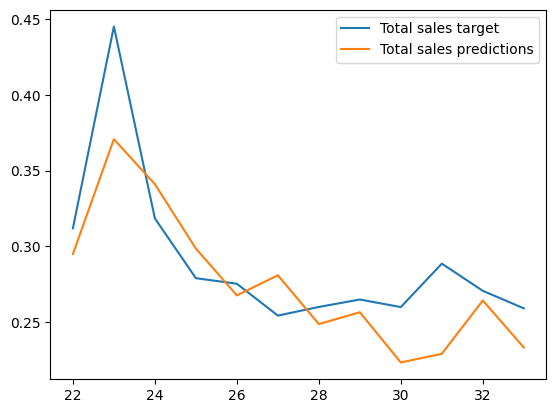

In [14]:
total_sails=df.groupby('date_block_num').agg({'sales':'mean','preds':'mean'})

plt.plot(np.arange(22,34,dtype=int),total_sails['sales'], label='Total sales target' )
plt.plot(np.arange(22,34,dtype=int),total_sails['preds'], label='Total sales predictions' )
plt.legend()

In [15]:
big_errors=[]
big_errors_th=7

In [16]:
def mse(target, pred):
    return (target-pred)**2

def mae(target, pred):
    return np.abs(target-pred)


def smape(A,F):
    return 100 * (2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def mape(A,F):
    return 100 * np.abs(F - A) / np.abs(A)

In [17]:
df['mae_errors'] = mae(df['preds'] , df['sales'] )
df['smape_errors'] = smape(df['preds'] , df['sales'] )

In [27]:
df['smape_errors'][df['smape_errors'].isna()]=0

/tmp/ipykernel_64486/1378965532.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['smape_errors'][df['smape_errors'].isna()]=0
/tmp/ipykernel_64486/1378965532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

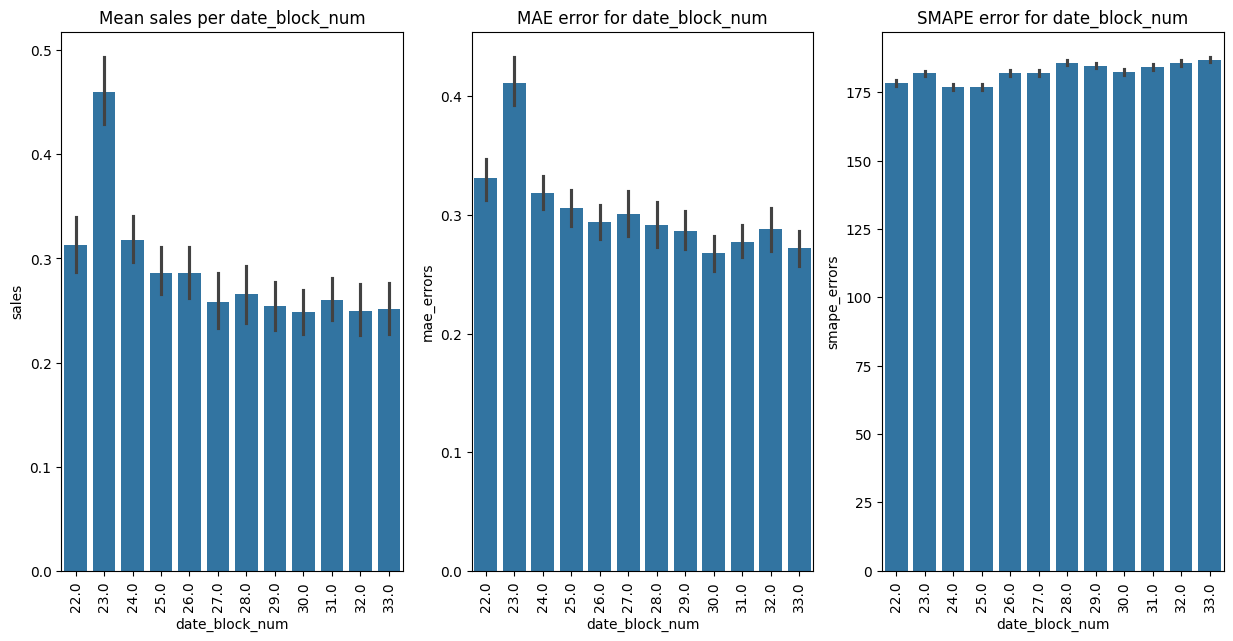

In [37]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,7))
df_sel = df.sample(n=100000)

sns.barplot(x=df_sel['date_block_num'],y=df_sel['sales'],ax=ax[0])
ax[0].set_title('Mean sales per date_block_num')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(x=df_sel['date_block_num'],y=df_sel['mae_errors'],ax=ax[1])
sns.barplot(x=df_sel['date_block_num'],y=df_sel['smape_errors'],ax=ax[2])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('MAE error for date_block_num')
ax[2].tick_params(axis='x', labelrotation=90)
ax[2].set_title('SMAPE error for date_block_num');

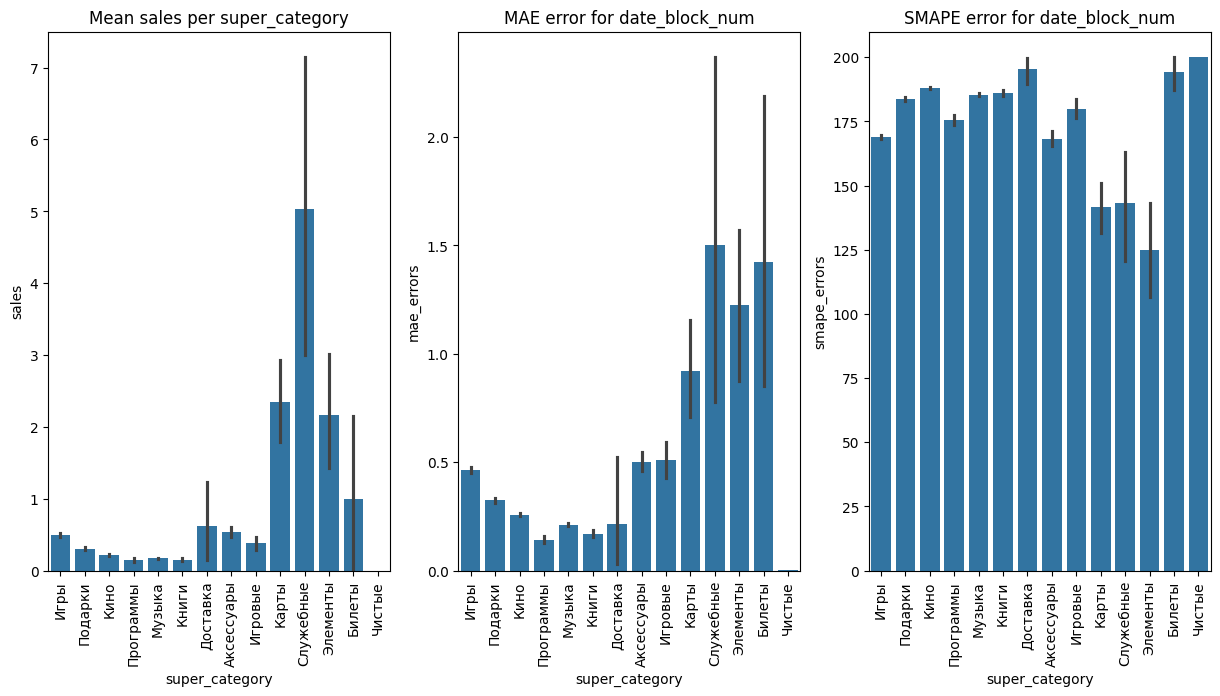

In [40]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,7))
df_sel = df.sample(n=100000)

sns.barplot(x=df_sel['super_category'],y=df_sel['sales'],ax=ax[0])
ax[0].set_title('Mean sales per super_category')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(x=df_sel['super_category'],y=df_sel['mae_errors'],ax=ax[1])
sns.barplot(x=df_sel['super_category'],y=df_sel['smape_errors'],ax=ax[2])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('MAE error for date_block_num')
ax[2].tick_params(axis='x', labelrotation=90)
ax[2].set_title('SMAPE error for date_block_num');

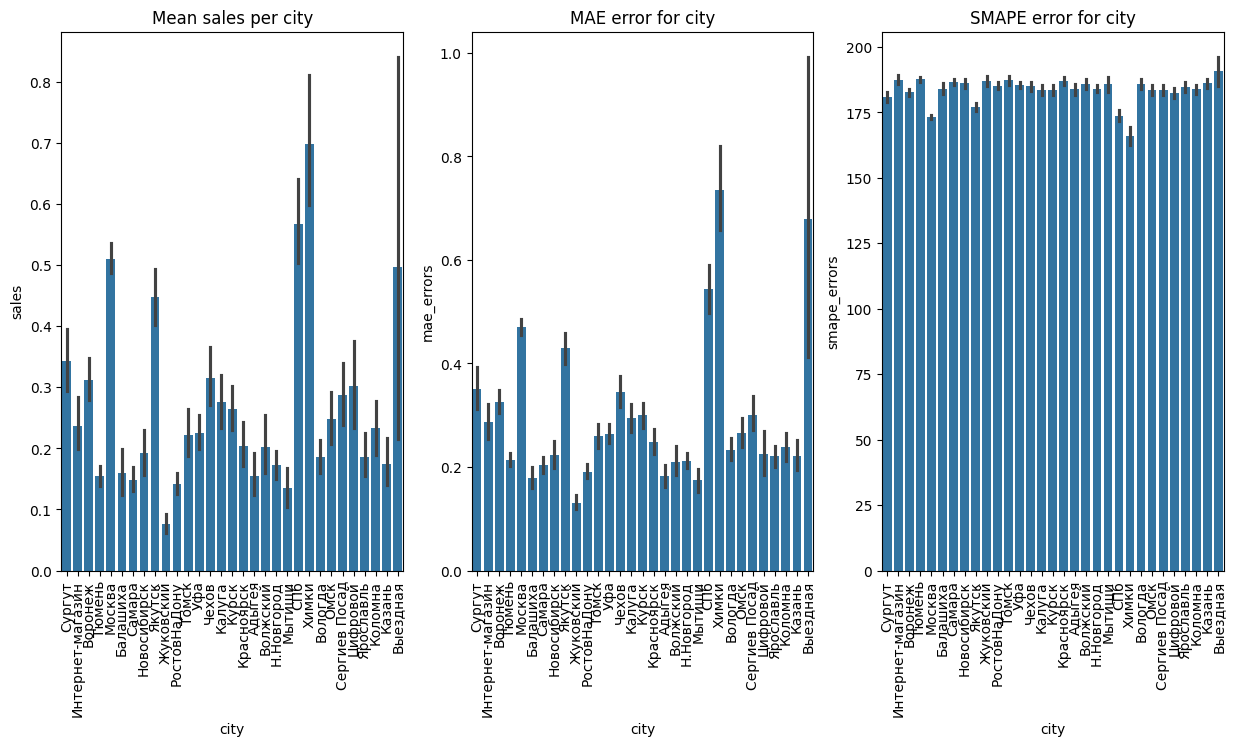

In [36]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,7))
df_sel = df.sample(n=100000)

sns.barplot(x=df_sel['city'],y=df_sel['sales'],ax=ax[0])
ax[0].set_title('Mean sales per city')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(x=df_sel['city'],y=df_sel['mae_errors'],ax=ax[1])
sns.barplot(x=df_sel['city'],y=df_sel['smape_errors'],ax=ax[2])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('MAE error for city')
ax[2].tick_params(axis='x', labelrotation=90)
ax[2].set_title('SMAPE error for city');

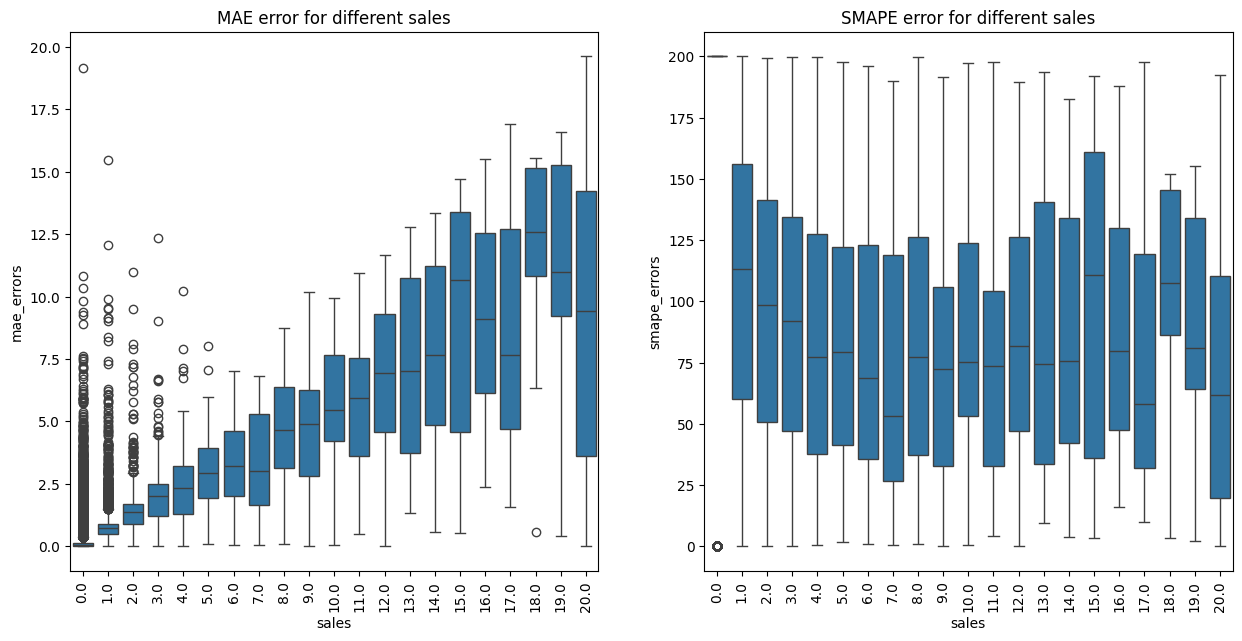

In [32]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
df_sel = df.sample(n=100000)
sns.boxplot(x=df_sel['sales'],y=df_sel['mae_errors'],ax=ax[0])
sns.boxplot(x=df_sel['sales'],y=df_sel['smape_errors'],ax=ax[1])

ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title('MAE error for different sales')

ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('SMAPE error for different sales');
#SMAPE is undefined in 0